<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/04_Transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning fine tuning
In this project we use food dataset (10 classes) and pretrained on imagenet models. We use new technics as:
- Functional API
- image_dataset_from_directory

*note* this notebook was created with Colab, path links can be different if you run it on Jupyter

### Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

In [2]:
# Get helper functions from my GitHub account.
!wget 'https://raw.githubusercontent.com/Natali-bali/TensorFlow_Tutorial/master/helper_functions.py'

--2021-06-20 16:21:51--  https://raw.githubusercontent.com/Natali-bali/TensorFlow_Tutorial/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10447 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.20K  --.-KB/s    in 0s      

2021-06-20 16:21:51 (62.3 MB/s) - ‘helper_functions.py’ saved [10447/10447]



In [3]:
#Download Data(10% from food pictures)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

--2021-06-20 16:21:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.217.8.16, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   165MB/s    in 1.0s    

2021-06-20 16:21:54 (165 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [11]:
from helper_functions import unzip_file, plot_pictures, classes_names, walk_through_dir, plot_loss_curves, create_tf_board_callback

In [26]:
unzip_file('/content/10_food_classes_10_percent.zip')

In [27]:
dir_name = '/content/10_food_classes_10_percent'
dir_train = '/content/10_food_classes_10_percent/train'
dir_test = '/content/10_food_classes_10_percent/test'

### Inspect folders

In [8]:
walk_through_dir(dir_name)

There are 2 directories, 0 files in /content/10_food_classes_10_percent
There are 10 directories, 0 files in /content/10_food_classes_10_percent/train
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/chicken_curry
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/pizza
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/steak
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/sushi
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/fried_rice
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/grilled_salmon
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/chicken_wings
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/ramen
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/ice_cream
There are 0 directories, 75 files in /content/10_f

### Check classes names

In [9]:
classes_names = classes_names(dir_test)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


### Plot random pictures for each class

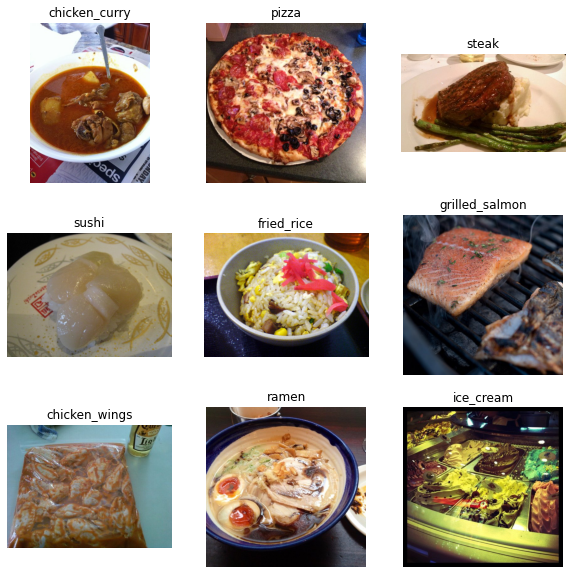

In [10]:
plot_pictures(dir_train)

### Image Dataset from directory
Now instead of ImageDataGenerator we will use new method
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

tf.keras.preprocessing.image_dataset_from_directory

In [23]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [24]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

In [28]:
train_data = image_dataset_from_directory(dir_train, 
                                          labels = 'inferred', 
                                          image_size = IMG_SIZE,
                                          batch_size = BATCH_SIZE,
                                          label_mode = 'categorical')
test_data = image_dataset_from_directory(dir_test, 
                                          labels = 'inferred', 
                                         image_size = IMG_SIZE,
                                          batch_size = BATCH_SIZE,
                                          label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [105]:
train_data
#It has different dimentions, None = batch size

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [143]:
len(train_data)

24

### Check classes(new option)

In [144]:
classes_names = train_data.class_names
classes_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### See an example of batch data

In [16]:
#for images, labels in train_data.take(1):
  #for image, label in zip(images, labels):
    #print(image)

### Build first model from applications tf.keras.applications.efficientnet.EfficientNetB0(
  

In [17]:
K.clear_session()

In [13]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, decode_predictions

In [19]:
model_1 = EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None,
                          input_shape=None, pooling=None, classes=1000,
                          classifier_activation='softmax')

21839872/21834768 [==============================] - 0s 0us/step


### Make predictions

In [20]:
for images, labels in train_data.take(1):
  for image, label in zip(images, labels):
    pred = model_1.predict(tf.expand_dims(image, axis = 0))
    print('Predicted:', decode_predictions(pred, top=1)[0])
    print('Real:', classes_names[tf.argmax(np.array(label))])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n07579787', 'plate', 0.18376587)]
Real: sushi
Predicted: [('n07871810', 'meat_loaf', 0.470818)]
Real: steak
Predicted: [('n07590611', 'hot_pot', 0.33469447)]
Real: chicken_curry
Predicted: [('n07873807', 'pizza', 0.4297057)]
Real: pizza
Predicted: [('n07614500', 'ice_cream', 0.24176067)]
Real: ice_cream
Predicted: [('n07836838', 'chocolate_sauce', 0.37690538)]
Real: steak
Predicted: [('n07579787', 'plate', 0.65310544)]
Real: steak
Predicted: [('n07697313', 'cheeseburger', 0.27640948)]
Real: hamburger
Predicted: [('n07614500', 'ice_cream', 0.5997285)]
Real: ice_cream
Predicted: [('n07880968', 'burrito', 0.2860164)]
Real: fried_rice
Predicted: [('n07579787', 'plate', 0.29444417)]
Real: fried_rice
Predicted: [('n07714990', 'broccoli', 0.27784804)]
Real: grilled_salmon
Predicted: [('n07873807', 'pizza', 0.3767553)]
Real: pizza
Predicted: [('n07875152', 'potpie', 0.16941589)]
Real: fried_rice
Predicted: [('n0757978

### Build second model (from tutorial)

In [21]:
K.clear_session()

In [22]:
base_model = EfficientNetB0(include_top=False)

16711680/16705208 [==============================] - 1s 0us/step


In [23]:
# Freeze base_model layers, so they are not trainable
base_model.trainable = False

In [24]:
# Create inputs 
inputs = tf.keras.layers.Input(shape=(224,224,3), name = 'input_layer')

In [25]:
# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

In [26]:
#pass inputs to base model using functionl API
x = base_model(inputs)

In [27]:
print(x.shape)

(None, 7, 7, 1280)


In [28]:
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)
x.shape

TensorShape([None, 1280])

In [29]:
#Add output layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

In [30]:
x.shape

TensorShape([None, 1280])

In [31]:
model_2 = tf.keras.Model(inputs, outputs)

In [32]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history_2 = model_2.fit(train_data, epochs = 5, validation_data = test_data, steps_per_epoch=len(train_data), validation_steps=int(0.25*len(test_data))) 

Epoch 1/5
24/24 [==============================] - 70s 3s/step - loss: 1.9458 - accuracy: 0.3613 - val_loss: 1.3681 - val_accuracy: 0.7056
Epoch 2/5
24/24 [==============================] - 63s 3s/step - loss: 1.1828 - accuracy: 0.7267 - val_loss: 0.9552 - val_accuracy: 0.7845
Epoch 3/5
24/24 [==============================] - 63s 3s/step - loss: 0.8754 - accuracy: 0.7880 - val_loss: 0.7789 - val_accuracy: 0.8191
Epoch 4/5
24/24 [==============================] - 63s 3s/step - loss: 0.7063 - accuracy: 0.8253 - val_loss: 0.6574 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 63s 3s/step - loss: 0.6127 - accuracy: 0.8507 - val_loss: 0.6117 - val_accuracy: 0.8372


### Evaluate model

In [34]:
model_2.evaluate(test_data)

79/79 [==============================] - 115s 1s/step - loss: 0.6204 - accuracy: 0.8392


[0.6204079389572144, 0.8392000198364258]

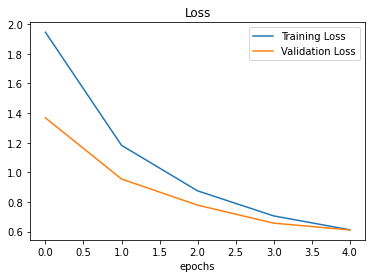

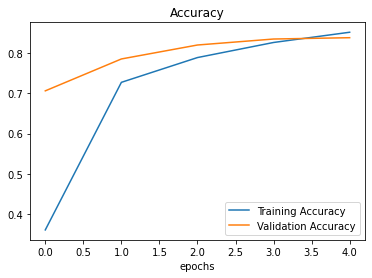

In [35]:
plot_loss_curves(history_2)

### Check our model arcitecture 

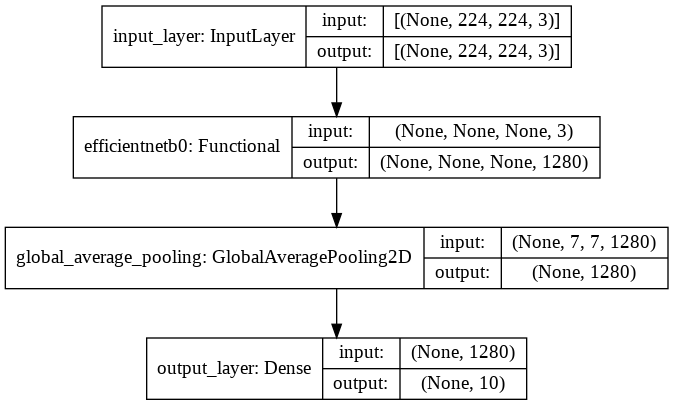

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)


In [37]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

### Check predictions

In [38]:
for images, labels in test_data.take(1):
  for image, label in zip(images, labels):
    pred = model_2.predict(tf.expand_dims(image, axis = 0))    
    print('Predicted:', classes_names[tf.argmax(pred[0])])
    print('Real:', classes_names[tf.argmax(np.array(label))])

Predicted: chicken_curry
Real: fried_rice
Predicted: steak
Real: steak
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: grilled_salmon
Real: chicken_curry
Predicted: steak
Real: chicken_curry
Predicted: chicken_wings
Real: chicken_wings
Predicted: chicken_curry
Real: chicken_curry
Predicted: sushi
Real: sushi
Predicted: hamburger
Real: hamburger
Predicted: chicken_curry
Real: chicken_curry
Predicted: hamburger
Real: hamburger
Predicted: ramen
Real: ramen
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: steak
Real: steak
Predicted: grilled_salmon
Real: hamburger
Predicted: steak
Real: hamburger
Predicted: hamburger
Real: hamburger
Predicted: chicken_curry
Real: chicken_curry
Predicted: chicken_wings
Real: chicken_wings
Predicted: pizza
Real: chicken_curry
Predicted: pizza
Real: pizza
Predicted: ice_cream
Real: sushi
Predicted: chicken_curry
Real: sushi
Predicted: ice_cream
Real: ice_cream
Predicted: grilled_salmon
Real: ha

In [39]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


### Understanding GlobalAveragePooling2D layer

In [40]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


We can see the tf.keras.layers.GlobalAveragePooling2D() layer condensed the input tensor from shape (1, 4, 4, 3) to (1, 3). It did so by averaging the input_tensor across the middle two axes.


We can replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.

Doing this not only makes the output of the base model compatible with the input shape requirement of our output layer (tf.keras.layers.Dense()), it also condenses the information found by the base model into a lower dimension feature vector.


🔑 Note: One of the reasons feature extraction transfer learning is named how it is is because what often happens is a pretrained model outputs a feature vector (a long tensor of numbers, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out of.


🛠 Practice: Do the same as the above cell but for tf.keras.layers.GlobalMaxPool2D().

In [41]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [42]:
# Pass the random tensor through a global Max pooling 2D layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"2D global max pooled random tensor:\n {global_max_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_max_pooled_tensor.shape}")

2D global max pooled random tensor:
 [[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


### Try model with GlobalMaxPoll2D

In [43]:
x = base_model(inputs)
x = tf.keras.layers.GlobalMaxPool2D(name = 'global_max_pool_2D')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output')(x)
model_3 = tf.keras.Model(inputs, outputs)

In [44]:
model_3.compile(optimizer='adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [45]:
model_3.fit(train_data, epochs = 5, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=int(.25*len(test_data)))

Epoch 1/5
24/24 [==============================] - 69s 3s/step - loss: 3.8927 - accuracy: 0.2440 - val_loss: 2.1886 - val_accuracy: 0.4326
Epoch 2/5
24/24 [==============================] - 64s 3s/step - loss: 1.5791 - accuracy: 0.5627 - val_loss: 1.4216 - val_accuracy: 0.5987
Epoch 3/5
24/24 [==============================] - 65s 3s/step - loss: 1.0671 - accuracy: 0.6920 - val_loss: 1.1744 - val_accuracy: 0.6628
Epoch 4/5
24/24 [==============================] - 65s 3s/step - loss: 0.7744 - accuracy: 0.7733 - val_loss: 1.1580 - val_accuracy: 0.6941
Epoch 5/5
24/24 [==============================] - 66s 3s/step - loss: 0.6542 - accuracy: 0.8013 - val_loss: 1.1368 - val_accuracy: 0.7105


### Running a series of transfer learning experiments
We've seen the incredible results of transfer learning on 10% of the training data, what about 1% of the training data?


We will run the following modelling experiments:
- model_4: Use feature extraction transfer learning on 1% of the training data with data augmentation.
- model_5: Use feature extraction transfer learning on 10% of the training data with data augmentation.
- model_6: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
- model_7: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

While all of the experiments will be run on different versions of the training data, they will all be evaluated on the same test dataset, this ensures the results of each experiment are as comparable as possible.


All experiments will be done using the EfficientNetB0 model within the tf.keras.applications module.

To make sure we're keeping track of our experiments, we'll use our create_tensorboard_callback() function to log all of the model training logs.


We'll construct each model using the Keras Functional API and instead of implementing data augmentation in the ImageDataGenerator class as we have previously, we're going to build it right into the model using the tf.keras.layers.experimental.preprocessing module.

### Downloading and unzip 1% data

In [14]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-06-20 09:39:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   176MB/s    in 0.7s    

2021-06-20 09:39:50 (176 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [15]:
unzip_file('/content/10_food_classes_1_percent.zip')

### Inspect directories

In [16]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories, 0 files in /content/10_food_classes_1_percent
There are 10 directories, 0 files in /content/10_food_classes_1_percent/train
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/chicken_curry
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/pizza
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/steak
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/sushi
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/fried_rice
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/grilled_salmon
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/chicken_wings
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/ramen
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/ice_cream
There are 0 directories, 7 files in /content/10_food_classes_1_percent

In [17]:
dir_train_1 = '/content/10_food_classes_1_percent/train'
dir_test = '/content/10_food_classes_1_percent/test'

### Get train/test data ready. Preprocess train data with augmentation

In [18]:
train_data_1 = image_dataset_from_directory(dir_train_1, image_size = IMG_SIZE, label_mode = 'categorical', batch_size=BATCH_SIZE)
test_data = image_dataset_from_directory(dir_test, label_mode='categorical', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Create model_4 (1% Data with augmentation)

In [128]:
K.clear_session()

In [129]:
base_model = EfficientNetB0(include_top=False)
base_model.trainable = False

In [130]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
#We can use this sintax
# flip_layer = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
# rotation_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
gap_layer = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')
outputs = tf.keras.layers.Dense(10, activation='softmax')

In [131]:
#Or we can create Sequential layer for augmentation
augmentation_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)

In [133]:
x = augmentation_layer(inputs)
x = base_model(x)
#x = flip_layer(inputs)
#x = rotation_layer(x)
x = gap_layer(x)
outputs = outputs(x)

In [134]:
model_4 = tf.keras.Model(inputs, outputs)

In [135]:
#Create tensorboard callback function. I dublicate function, because it had a bug from our helper file and 
#i didnt want to restart all notebook. Now the bug is fixed
import datetime
def create_tf_board_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving TensorBoard log files to {log_dir}')
  return tensorflow_callback
tf_board_1 = create_tf_board_callback('food_classification_efficientNetB0', '1%_data_augmented')

Saving TensorBoard log files to food_classification_efficientNetB0/1%_data_augmented/20210620-104405


### Plot augmented pictures

In [122]:
import random
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_pictures(path, rows_num = 10):
    dir_names = listdir(path)
    plt.figure(figsize=(10,20))
    for dir_name, num in zip(dir_names, range(1, 2*len(dir_names)-1, 2)):
        files_names = listdir(path + '/' + dir_name)
        
        random_img = mpimg.imread(path + '/'+dir_name + '/' + random.choice(files_names))
        augmented_img = augmentation_layer(tf.expand_dims(random_img, axis=0)) 
        
        plt.subplot(rows_num, 2, num)
        plt.imshow(tf.squeeze(augmented_img)/255.)
        plt.title(f'Normal image from {dir_name}')
        plt.axis('off')
        plt.subplot(rows_num, 2, num+1)
        plt.imshow(random_img/255.)
        plt.title(f'Augmented img from {dir_name}')
        plt.axis('off')


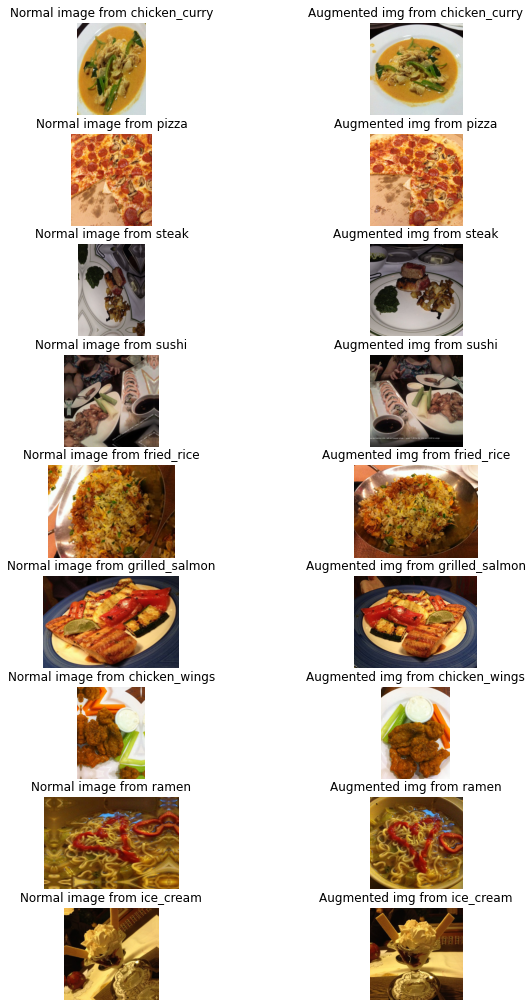

In [123]:
plot_pictures('/content/10_food_classes_1_percent/train', rows_num = 10)

In [136]:
model_4.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [137]:
model_4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [138]:
history_4 = model_4.fit(train_data_1, epochs = 5, callbacks=[tf_board_1], steps_per_epoch=len(train_data_1),
            validation_data = test_data, validation_steps = len(test_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
3/3 [==============================] - 17s 6s/step - loss: 2.3102 - accuracy: 0.1571 - val_loss: 2.2265 - val_accuracy: 0.1720
Epoch 2/5
3/3 [==============================] - 10s 5s/step - loss: 2.0995 - accuracy: 0.3000 - val_loss: 2.1165 - val_accuracy: 0.2444
Epoch 3/5
3/3 [==============================] - 9s 5s/step - loss: 1.9490 - accuracy: 0.4000 - val_loss: 2.0176 - val_accuracy: 0.3144
Epoch 4/5
3/3 [==============================] - 9s 4s/step - loss: 1.8216 - accuracy: 0.5000 - val_loss: 1.9291 - val_accuracy: 0.3684
Epoch 5/5
3/3 [==============================] - 9s 4s/step - loss: 1.6727 - accuracy: 0.6000 - val_loss: 1.8443 - val_accuracy: 0.4212


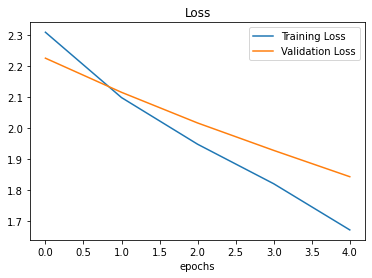

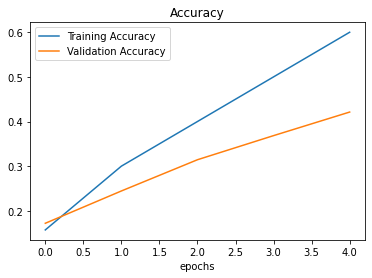

In [139]:
plot_loss_curves(history_4)

### Build model_5 with 10% dataset (same as model_4)

In [172]:
K.clear_session()

In [173]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
aug_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
gap_layer = tf.keras.layers.GlobalMaxPooling2D(name = 'global_max_pooling_2d')
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')

In [174]:
x = aug_layer(inputs)
x = base_model(x)
#we can use this syntax x = base_model(x, training = False)
x = gap_layer(x)
outputs = outputs(x)
model_5 = tf.keras.Model(inputs, outputs)

In [175]:
# model_5 = tf.keras.models.clone_model(model_4)
# model_5.summary()
#Note: if i just clone the model it doesnt learn anything! Wondering why

In [176]:
model_5.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

### Create model checkpoint callback function
Callback to save the Keras model or model weights at some frequency.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

The ModelCheckpoint callback gives you the ability to save your model, as a whole in the SavedModel format or the weights (patterns) only to a specified directory as it trains.

This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains. It also means if you think your model could benefit from being trained for longer, you can reload it from a specific checkpoint and continue training from there.

For example, say you fit a feature extraction transfer learning model for 5 epochs and you check the training curves and see it was still improving and you want to see if fine-tuning for another 5 epochs could help, you can load the checkpoint, unfreeze some (or all) of the base model layers and then continue training.

In [177]:
#We save weights only
checkpoint_filepath = 'content/checkpoints/checkpoint.ckpt'
model_checkpoints = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                                        save_weights_only=True, save_freq='epoch',
                                                        options=None)

In [178]:
history_5 = model_5.fit(train_data, epochs = 5, 
                        callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented'), model_checkpoints],
                        steps_per_epoch=len(train_data),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented/20210620-113045
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 20s 639ms/step - loss: 3.5335 - accuracy: 0.1893 - val_loss: 2.4734 - val_accuracy: 0.3636

Epoch 00001: val_loss improved from inf to 2.47338, saving model to content/checkpoints/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 14s 598ms/step - loss: 2.2381 - accuracy: 0.4173 - val_loss: 1.7730 - val_accuracy: 0.5440

Epoch 00002: val_loss improved from 2.47338 to 1.77305, saving model to content/checkpoints/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 14s 579ms/step - loss: 1.5598 - accuracy: 0.5560 - val_loss: 1.3967 - val_accuracy: 0.6180

Epoch 00003: val_loss improved from 1.77305 to 1.39668, saving model to content/checkpoints/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 13s 547ms/step - loss: 1.3720 - accuracy: 0.5813 - val_loss: 1.3545 - val_accuracy: 0.6488

Epoch 00004: val_loss improved from 1.39668 to 1.35453, saving model to content/checkpoints/checkpoint.ckpt
Epoch 5/5


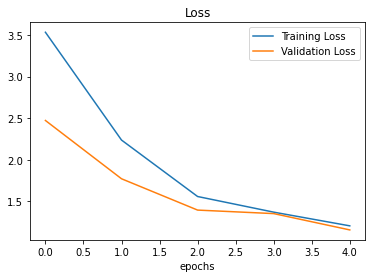

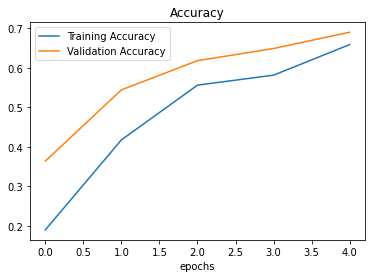

In [179]:
plot_loss_curves(history_5)

In [180]:
model_5.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 1.1585 - accuracy: 0.6900


[1.158456802368164, 0.6899999976158142]

### Loading in checkpointed weights

We can keep training this model longer

In [181]:
model_5.load_weights(checkpoint_filepath)

In [182]:
model_5.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 1.1585 - accuracy: 0.6900


[1.1584570407867432, 0.6899999976158142]

In [184]:
history_5_2 = model_5.fit(train_data, epochs = 5, 
                        callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented'), 
                                     tf.keras.callbacks.ModelCheckpoint('content/checkpoints/checkpoint_2.ckpt', monitor='val_loss', 
                                                                                            verbose=1, save_best_only=True,
                                                                                            save_weights_only=True, save_freq='epoch',
                                                                                            options=None)],
                        steps_per_epoch=len(train_data),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented/20210620-113749
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 15s 626ms/step - loss: 1.0363 - accuracy: 0.6867 - val_loss: 0.9876 - val_accuracy: 0.7160

Epoch 00001: val_loss improved from inf to 0.98763, saving model to content/checkpoints/checkpoint_2.ckpt
Epoch 2/5
24/24 [==============================] - 14s 572ms/step - loss: 1.0660 - accuracy: 0.6867 - val_loss: 1.1071 - val_accuracy: 0.7068

Epoch 00002: val_loss did not improve from 0.98763
Epoch 3/5
24/24 [==============================] - 14s 577ms/step - loss: 0.8653 - accuracy: 0.7160 - val_loss: 1.1073 - val_accuracy: 0.7128

Epoch 00003: val_loss did not improve from 0.98763
Epoch 4/5
24/24 [==============================] - 13s 551ms/step - loss: 0.8973 - accuracy: 0.7187 - val_loss: 1.0374 - val_accuracy: 0.7224

Epoch 00004: val_loss did not improve from 0.98763
Epoch 5/5
24/24 [==============================] - 14s 592ms/step - loss: 0.7915 - accuracy: 0.7493 - val_loss: 1.1718 - val_accuracy: 0.7044

Epoch 00005: val_loss did not improv

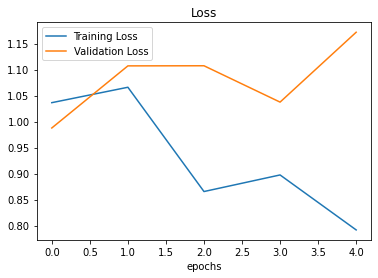

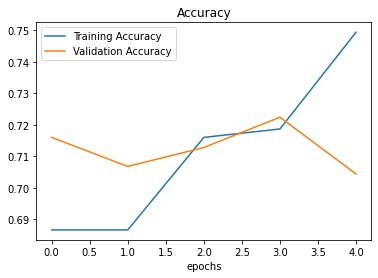

In [185]:
plot_loss_curves(history_5_2)

### Try same model as model_5 and train it for 10 epochs(compare to previous results)

In [186]:
K.clear_session()

In [187]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
aug_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
gap_layer = tf.keras.layers.GlobalMaxPooling2D(name = 'global_max_pooling_2d')
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')

In [188]:
x = aug_layer(inputs)
x = base_model(x)
#we can use this syntax x = base_model(x, training = False)
x = gap_layer(x)
outputs = outputs(x)
model_6 = tf.keras.Model(inputs, outputs)

In [189]:
model_6.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [190]:
history_6 = model_6.fit(train_data, epochs = 10, 
                        callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented_10_epochs')],
                        steps_per_epoch=len(train_data),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented_10_epochs/20210620-114218
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 21s 645ms/step - loss: 3.5820 - accuracy: 0.2173 - val_loss: 2.3322 - val_accuracy: 0.3756
Epoch 2/10
24/24 [==============================] - 13s 558ms/step - loss: 2.1292 - accuracy: 0.4227 - val_loss: 1.6516 - val_accuracy: 0.5484
Epoch 3/10
24/24 [==============================] - 13s 547ms/step - loss: 1.6284 - accuracy: 0.5373 - val_loss: 1.3261 - val_accuracy: 0.6288
Epoch 4/10
24/24 [==============================] - 13s 538ms/step - loss: 1.3271 - accuracy: 0.6173 - val_loss: 1.4065 - val_accuracy: 0.6312
Epoch 5/10
24/24 [==============================] - 13s 544ms/step - loss: 1.3043 - accuracy: 0.6307 - val_loss: 1.3392 - val_accuracy: 0.6516
Epoch 6/10
24/24 [==============================] - 13s 555ms/step - loss: 1.0823 - accuracy: 0.6627 - val_loss: 1.1618 - val_accuracy: 0.6824
Epoch 7/10
24/24 [==============================] - 13s 558ms/step - loss: 0.9849 - accuracy: 0.6933 - val_loss: 1.0102 - val_accuracy: 0.7224
Epoch 8/10

### Model 7: Fine-tuning an existing model on 10% of the data

So far our saved model_5 has been trained using feature extraction transfer learning for 5 epochs on 10% of the training data and data augmentation.
This means all of the layers in the base model (EfficientNetB0) were frozen during training.

For our next experiment we're going to switch to fine-tuning transfer learning. This means we'll be using the same base model except we'll be unfreezing some of its layers (ones closest to the top) and running the model for a few more epochs.

The idea with fine-tuning is to start customizing the pre-trained model more to our own data.

In [200]:
#Build model_7 as model 5 and save checkpoints


In [201]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
aug_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
gap_layer = tf.keras.layers.GlobalAveragePooling2D(name = 'global_max_pooling_2d')
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')

In [202]:
x = aug_layer(inputs)
x = base_model(x)
#we can use this syntax x = base_model(x, training = False)
x = gap_layer(x)
outputs = outputs(x)
model_7 = tf.keras.Model(inputs, outputs)

In [203]:
model_7.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [204]:
#We save weights only
checkpoint_filepath = 'content/checkpoints/checkpoint_7.ckpt'
model_checkpoints = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                                        save_weights_only=True, save_freq='epoch',
                                                        options=None)

In [205]:
history_7 = model_7.fit(train_data, epochs = 5, 
                        callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented'), model_checkpoints],
                        steps_per_epoch=len(train_data),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented/20210620-120417
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 20s 640ms/step - loss: 4.1142 - accuracy: 0.1933 - val_loss: 2.8068 - val_accuracy: 0.3500

Epoch 00001: val_loss improved from inf to 2.80677, saving model to content/checkpoints/checkpoint_7.ckpt
Epoch 2/5
24/24 [==============================] - 13s 552ms/step - loss: 2.3599 - accuracy: 0.4040 - val_loss: 1.5997 - val_accuracy: 0.5568

Epoch 00002: val_loss improved from 2.80677 to 1.59972, saving model to content/checkpoints/checkpoint_7.ckpt
Epoch 3/5
24/24 [==============================] - 13s 543ms/step - loss: 1.6697 - accuracy: 0.5293 - val_loss: 1.5154 - val_accuracy: 0.5856

Epoch 00003: val_loss improved from 1.59972 to 1.51535, saving model to content/checkpoints/checkpoint_7.ckpt
Epoch 4/5
24/24 [==============================] - 13s 533ms/step - loss: 1.3447 - accuracy: 0.5920 - val_loss: 1.1212 - val_accuracy: 0.6816

Epoch 00004: val_loss improved from 1.51535 to 1.12125, saving model to content/checkpoints/checkpoint_7.ckpt
Ep

In [206]:
model_7.layers

In [207]:
for layer in model_7.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4f97ba5ed0> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4f97c57810> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f4f9812dfd0> False
<tensorflow.python.keras.layers.pooling.GlobalMaxPooling2D object at 0x7f4f97b9c7d0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f501db14550> True


In [208]:
i=1
for layer in model_7.layers[2].layers:
  print(i, layer.name, layer.trainable)
  i+=1

1 input_2 False
2 rescaling_1 False
3 normalization_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39 block2b_se_resh

In [212]:
#Make top 10 layers trainable
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [214]:
#Recompile model_7
#We should lower learning rate(10x usual practice), so weights dont change too much 
model_7.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'], loss = 'categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [215]:
#Check layers again
i=1
for layer in model_7.layers[2].layers:
  print(i, layer.name, layer.trainable)
  i+=1

1 input_2 False
2 rescaling_1 False
3 normalization_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39 block2b_se_resh

In [218]:
#Fine tune for another 5 epochs
history_7_fine_tune = model_7.fit(train_data, epochs = 10, #initial_epoch = 5 plus new epochs = 5
                                  initial_epoch = history_7.epoch[-1],
                                  callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented_fine_tuned')],
                                  steps_per_epoch=len(train_data),
                                  validation_data = test_data, 
                                  validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented_fine_tuned/20210620-121655
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 582ms/step - loss: 0.9189 - accuracy: 0.7173 - val_loss: 0.9914 - val_accuracy: 0.7232
Epoch 6/10
24/24 [==============================] - 13s 553ms/step - loss: 0.9055 - accuracy: 0.7293 - val_loss: 0.9198 - val_accuracy: 0.7404
Epoch 7/10
24/24 [==============================] - 13s 550ms/step - loss: 0.6733 - accuracy: 0.7800 - val_loss: 0.8997 - val_accuracy: 0.7456
Epoch 8/10
24/24 [==============================] - 13s 528ms/step - loss: 0.6348 - accuracy: 0.7907 - val_loss: 0.8370 - val_accuracy: 0.7672
Epoch 9/10
24/24 [==============================] - 13s 536ms/step - loss: 0.5994 - accuracy: 0.8240 - val_loss: 0.8275 - val_accuracy: 0.7668
Epoch 10/10
24/24 [==============================] - 13s 539ms/step - loss: 0.5598 - accuracy: 0.8293 - val_loss: 0.7866 - val_accuracy: 0.7748


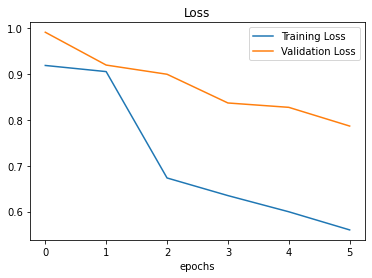

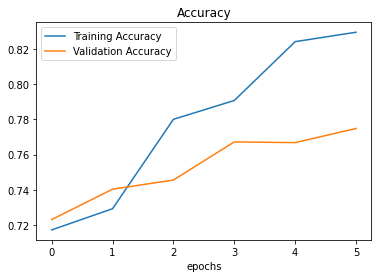

In [219]:
plot_loss_curves(history_7_fine_tune)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.19333332777023315, 0.40400001406669617, 0.5293333530426025, 0.5920000076293945, 0.625333309173584, 0.7173333168029785, 0.7293333411216736, 0.7799999713897705, 0.7906666398048401, 0.8240000009536743, 0.8293333053588867]


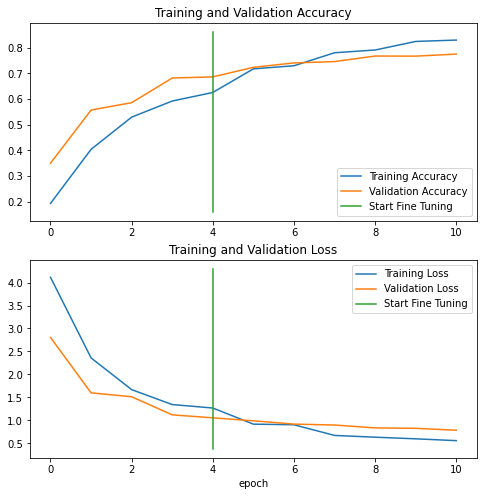

In [222]:
compare_historys(history_7, history_7_fine_tune)

### Lets repeat last model with all data (100%)
I change to GlobalAveragePooling2D layer this time (better results in tutorial)


In [15]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_file("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "/content/10_food_classes_all_data/train"

--2021-06-20 16:25:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.217.9.208, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M   210MB/s    in 2.4s    

2021-06-20 16:25:03 (210 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [16]:
train_data_100 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                      label_mode="categorical",
                                                                      image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.


In [17]:
K.clear_session()

In [18]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
aug_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
gap = tf.keras.layers.GlobalAveragePooling2D()
outputs = tf.keras.layers.Dense(10, activation = 'softmax')

In [19]:
x = aug_layer(inputs)
x = base_model(x)
x = gap(x)
outputs = outputs(x)
model_8 = tf.keras.Model(inputs, outputs)

In [20]:
model_8.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
#We save weights only
checkpoint_filepath = 'content/checkpoints/checkpoint_8.ckpt'
model_checkpoints = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                                        save_weights_only=True, save_freq='epoch',
                                                        options=None)

In [30]:
initial_epochs = 5
history_8 = model_8.fit(train_data_100, epochs = initial_epochs, 
                        callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '100%_data_augmented'), model_checkpoints],
                        steps_per_epoch=len(train_data),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/100%_data_augmented/20210620-162653
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 192s 8s/step - loss: 2.0268 - accuracy: 0.3138 - val_loss: 1.5112 - val_accuracy: 0.6316

Epoch 00001: val_loss improved from inf to 1.51119, saving model to content/checkpoints/checkpoint_8.ckpt
Epoch 2/5
24/24 [==============================] - 158s 7s/step - loss: 1.4744 - accuracy: 0.6042 - val_loss: 1.0720 - val_accuracy: 0.7500

Epoch 00002: val_loss improved from 1.51119 to 1.07205, saving model to content/checkpoints/checkpoint_8.ckpt
Epoch 3/5
24/24 [==============================] - 181s 8s/step - loss: 1.2461 - accuracy: 0.6393 - val_loss: 0.8817 - val_accuracy: 0.7872

Epoch 00003: val_loss improved from 1.07205 to 0.88170, saving model to content/checkpoints/checkpoint_8.ckpt
Epoch 4/5
24/24 [==============================] - 180s 8s/step - loss: 1.0455 - accuracy: 0.6862 - val_loss: 0.7578 - val_accuracy: 0.8156

Epoch 00004: val_loss improved from 0.88170 to 0.75784, saving model to content/checkpoints/checkpoint_8.ckpt
Epoch 5/5


In [31]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [32]:
model_8.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001), metrics = ['accuracy'], loss = 'categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [34]:
history_8_fine_tuned = model_8.fit(train_data_100, epochs = 10, 
                                  initial_epoch = history_8.epoch[-1],
                                  callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '100%_data_augmented_fine_tuned')],
                                  steps_per_epoch=len(train_data),
                                  validation_data = test_data, 
                                  validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/100%_data_augmented_fine_tuned/20210620-164623
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 195s 8s/step - loss: 0.9893 - accuracy: 0.7044 - val_loss: 0.6283 - val_accuracy: 0.8280
Epoch 6/10
24/24 [==============================] - 181s 8s/step - loss: 0.8782 - accuracy: 0.7591 - val_loss: 0.5782 - val_accuracy: 0.8328
Epoch 7/10
24/24 [==============================] - 165s 7s/step - loss: 0.9164 - accuracy: 0.7279 - val_loss: 0.5440 - val_accuracy: 0.8376
Epoch 8/10
24/24 [==============================] - 164s 7s/step - loss: 0.7844 - accuracy: 0.7695 - val_loss: 0.5123 - val_accuracy: 0.8444
Epoch 9/10
24/24 [==============================] - 164s 7s/step - loss: 0.8506 - accuracy: 0.7422 - val_loss: 0.4877 - val_accuracy: 0.8500
Epoch 10/10
24/24 [==============================] - 164s 7s/step - loss: 0.7821 - accuracy: 0.7552 - val_loss: 0.4706 - val_accuracy: 0.8544


In [ ]:
compare_historys(history_8, history_8_fine_tuned)

The proper way is to train model with all frozen layers on small dataset 10% and save its weights. Then we fine-tune our model on big dataset and check results. Test dataset always remain same